<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**선형 회귀 알고리즘을 이용하여 훈련 세트 범위 밖의 샘플을 예측할 수 있도록 하자!**

**데이터 준비**

In [13]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

train_input = train_input.reshape(-1, 1) #2차원 배열로 변경
test_input = test_input.reshape(-1, 1)



**선형회귀**

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))


[1173.94650537]


y=ax+b에서 x는 농어의 길이, y를 농어의 무게로 놓는다. <br>
LinearRegression 클래스가 이 데이터에 가장 잘 맞는 a, b를 coef_, intercept_ 속성에 저장되어 있다.

In [16]:
print(lr.coef_, lr.intercept_)

[36.01807875] -626.957432150881


coef_는 coefficient에서 온 것으로, 기울기를 종종 계수 혹은 가중치(weight)라고 한다.


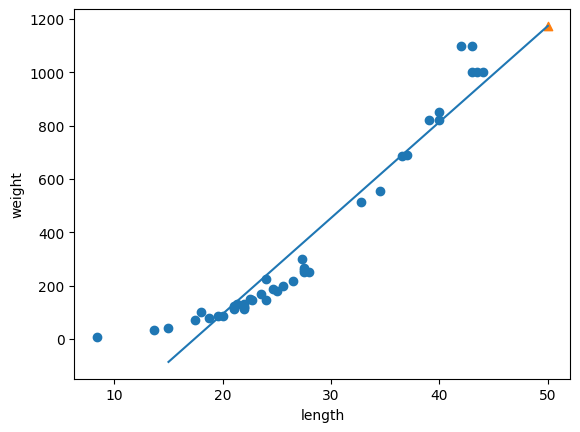

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

#농어의 길이가 15에서 50까지 직선 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1173.9, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



위 직선이 선형 회귀 알고리즘이 이 데이터 셋에서 찾은 최적의 직선이다.


In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.9215227719587541
0.8979027524243184


2차 방정식을 그리기 위한 데이터 준비

In [19]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [20]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) #입력 데이터를 제곱해준것처럼 이 값도 제곱해야 함

print(lr.coef_, lr.intercept_)


[1531.4230521]
[  1.02030616 -23.41845838] 151.58058320821664


무게 = 1.02 * length^2 - 23.4 * length + 151.58

**산점도 그리기**

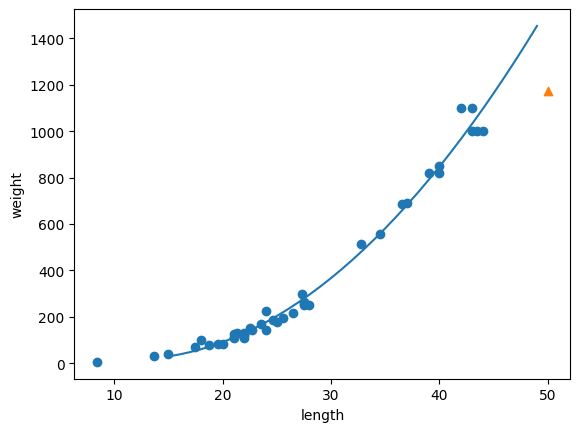

In [23]:
#1부터 49까지 정수 배열 생성
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.02 * point**2 - 23.4 * point + 151.38)

plt.scatter(50, 1173, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**훈련 세트와 테스트 세트의 R^2 점수 산출**

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))



0.9888044969849951
0.9165109635620643
